<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/phots_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist # Corrected the typo here

In [ ]:
fashion_mnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [3]:
fashion_mnist.load_data()
#

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
#

In [5]:
# train_data[0]
train_labels[0]

np.uint8(9)

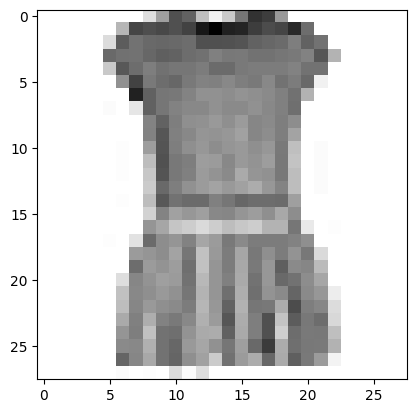

In [6]:
plt.imshow(train_data[3], cmap=plt.cm.binary)
# plt.show()

In [ ]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

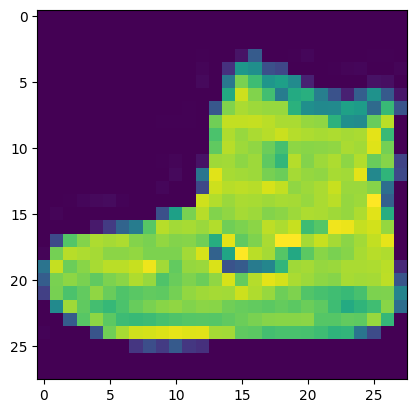

In [ ]:
plt.imshow(train_data[0])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

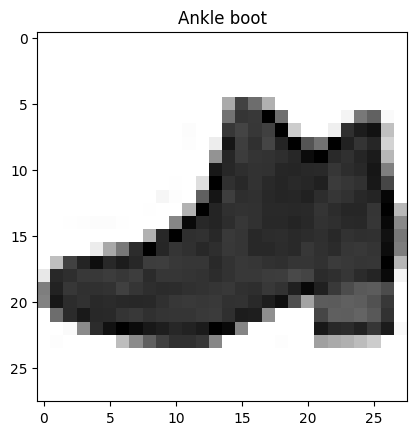

In [ ]:
plt.imshow(train_data[15], cmap=plt.cm.binary)
plt.title(class_names[train_labels[15]])
plt.show()

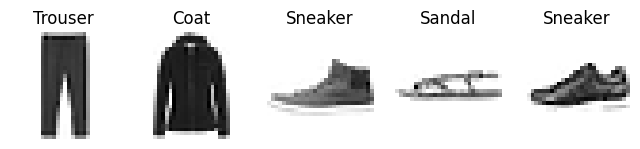

In [ ]:
import random
plt.figure(figsize=(8,8))
for i in range(5):
  ax=plt.subplot(1,5,i+1)
  idx=random.randint(0,len(train_data))
  plt.imshow(train_data[idx],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[idx]])
  plt.axis('off')

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6805 - loss: 5.9974 - val_accuracy: 0.7601 - val_loss: 0.7178
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7881 - loss: 0.6587 - val_accuracy: 0.7879 - val_loss: 0.6427
Epoch 3/10
  39/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8251 - loss: 0.5561

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-187f52c65336>", line 13, in <cell line: 0>
    model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
    opt_outputs = multi_step_on_iterator(iterator)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/

TypeError: object of type 'NoneType' has no len()

In [ ]:
model.evaluate(test_data,test_labels)

In [ ]:
train_data.min(),train_data.max()

(np.uint8(0), np.uint8(255))

In [ ]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [ ]:
train_data_norm.min(),train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
norm_history=model.fit(train_data_norm,train_labels,epochs=15,validation_data=(test_data_norm,test_labels))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7745 - loss: 0.6441 - val_accuracy: 0.8514 - val_loss: 0.4077
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8612 - loss: 0.3833 - val_accuracy: 0.8632 - val_loss: 0.3757
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8756 - loss: 0.3393 - val_accuracy: 0.8659 - val_loss: 0.3641
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8838 - loss: 0.3150 - val_accuracy: 0.8668 - val_loss: 0.3628
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8897 - loss: 0.2986 - val_accuracy: 0.8688 - val_loss: 0.3571
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8945 - loss: 0.2829 - val_accuracy: 0.8682 - val_loss: 0.3598
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8999 - loss: 0.2692 - val_accuracy: 0.8695 - val_loss: 0.3623
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9028 - loss: 0

In [ ]:
model.evaluate(test_data_norm,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8742 - loss: 0.3802


[0.37488096952438354, 0.8762999773025513]

In [ ]:
predicted_classes = np.argmax(y_preds, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=predicted_classes)

array([[806,   5,  20,  48,   5,   1, 110,   0,   5,   0],
       [  1, 972,   1,  17,   3,   0,   4,   1,   1,   0],
       [ 17,   3, 822,  23,  91,   0,  42,   0,   1,   1],
       [ 13,   9,  10, 887,  51,   0,  26,   0,   4,   0],
       [  1,   0, 124,  27, 810,   0,  35,   0,   3,   0],
       [  0,   0,   0,   1,   0, 952,   0,  30,   1,  16],
       [102,   2, 101,  39, 102,   0, 645,   0,   9,   0],
       [  0,   0,   0,   0,   0,  11,   0, 980,   0,   9],
       [  9,   3,   1,   9,   4,   3,   5,   5, 961,   0],
       [  0,   0,   0,   0,   0,   7,   1,  64,   0, 928]])

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

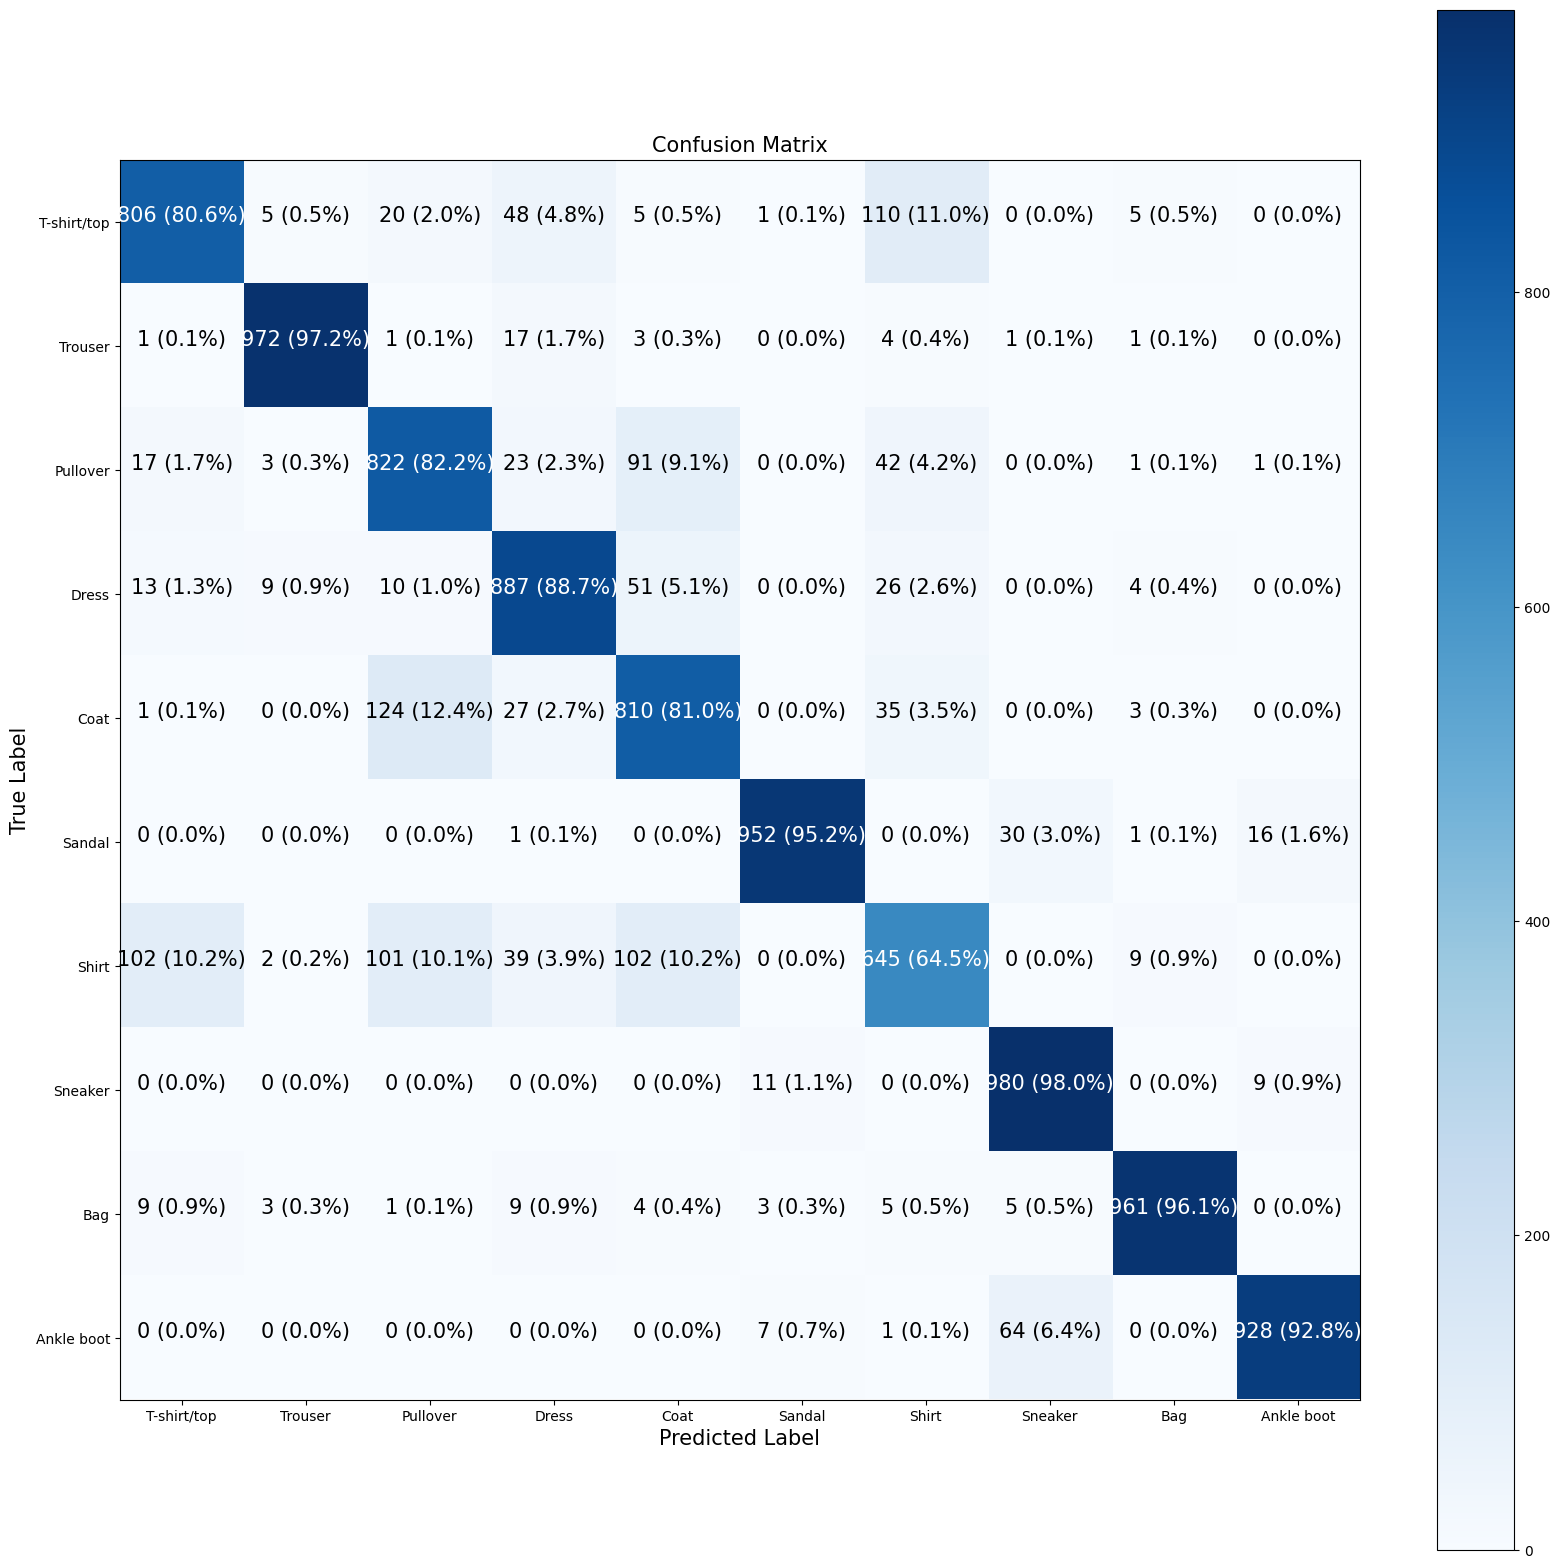

In [ ]:
# Use the user-defined function to plot the confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=predicted_classes,
                      classes=class_names,
                      figsize=(20,20),
                      text_size=15)